In [195]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Column names based on the screenshot
columns = [
    "1N-Z", "N", "Z", "A", "EL", "O", "Mass Excess (keV)", "Mass Excess Uncertainty",
    "Binding Energy per A (keV)", "Binding Energy per A Uncertainty", "Beta-Decay Mode",
    "Beta-Decay Energy (keV)", "Beta-Decay Energy Uncertainty","Atomic Mass (micro-u)",
    "Atomic Mass Uncertainty"
]

colspecs = [
    (0, 5),    #1N-Z (adjust if needed)
    (6, 10),   # N
    (11, 15),  # Z
    (16, 20),  # A
    (21, 23),  # EL
    (24, 29),  # O
    (30, 43),  # Mass Excess (keV)
    (44, 54),  # Mass Excess Uncertainty
    (55, 67),  # Binding Energy per A (keV)
    (68, 77),  # Binding Energy per A Uncertainty
    (78, 82),  # Beta-Decay Mode
    (83, 95),  # Beta-Decay Energy (keV)
    (96, 106),  # Beta-Decay Energy Uncertainty
    (107, 121), # Atomic Mass (micro-u) 
    (122, 140), # Atomic Mass Uncertainty
   
]


# Read the fixed-width file with the specified column widths
#df = pd.read_fwf('data/mass_1.txt', names=columns, colspecs=colspecs, skiprows=1)


# Reading the fixed-width formatted file
df_20 = pd.read_fwf('data/mass_1.txt', names=columns, colspecs=colspecs, skiprows=1)
df_16 = pd.read_fwf('data/mass16.txt', names=columns, colspecs=colspecs, skiprows=1)

# Print the dataframe
#print(df.head())


In [197]:
def remove_dash(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Removes all occurrences of the character '#' from a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    col (str): The name of the column from which to remove the '#' character.

    Returns:
    pd.DataFrame: The updated DataFrame with the '#' character removed from the specified column.
    """
    try:
        if col in df.columns:
            # Replace '#' with an empty string
            df[col] = df[col].str.replace('#', '', regex=False)
            return df
        else:
            raise KeyError(f"Column '{col}' not found in the DataFrame.")
    except Exception as e:
        print(f"Error occurred: {e}")
        return df  # Return the DataFrame even if there's an error, unchanged.
    

In [198]:
def convert_column_to_float(df: pd.DataFrame, column_name) -> pd.DataFrame:
    """
    Convert a specified column in a DataFrame to float type.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column_name (str): The name of the column to be converted.

    Returns:
    pd.DataFrame: DataFrame with the specified column converted to float.
    """
    try:
        df[column_name] = df[column_name].astype(float)
        print(f"Column '{column_name}' successfully converted to float.")
    except ValueError:
        print(f"Error: Column '{column_name}' contains non-numeric values and cannot be converted.")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
    
    return df


In [199]:
def drop_columns(df: pd.DataFrame, columns_to_drop: list) -> pd.DataFrame:
    """
    Drops specified columns from the DataFrame, if they exist.

    Parameters:
    df (pd.DataFrame): The original DataFrame from which columns will be dropped.
    columns_to_drop (list): A list of column names to drop.

    Returns:
    pd.DataFrame: A new DataFrame with the specified columns removed.
    """
    # Check if columns exist in DataFrame
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    missing_columns = [col for col in columns_to_drop if col not in df.columns]
    
    # Log missing columns
    if missing_columns:
        print(f"Warning: The following columns are not in the DataFrame and will be skipped: {missing_columns}")
    
    # Drop existing columns
    df_cleaned = df.drop(existing_columns, axis=1)
    
    return df_cleaned


In [200]:
# Shell occupation function
def calculate_shell_occupation(nucleons, shells, shell_order):
    occupation = {}
    remaining_nucleons = nucleons
    last_filled_shell = None  # Initialize to None to handle empty cases

    for shell in shell_order:
        capacity = shells[shell]
        if remaining_nucleons > capacity:
            occupation[shell] = capacity
            remaining_nucleons -= capacity
        else:
            occupation[shell] = remaining_nucleons
            last_filled_shell = shell  # This is the last shell with nucleons
            break

    if last_filled_shell is None:  # Handle case where nucleons exactly fill shells
        last_filled_shell = shell_order[-1]

    return occupation, last_filled_shell

# Find shell occupation based on Z and N
def find_shell_occupation(Z, N):
    # Define shell capacities (extended for higher Z and N values)
    shells = {
        '1s1/2': 2,
        '1p3/2': 4,
        '1p1/2': 2,
        '1d5/2': 6,
        '2s1/2': 2,
        '1d3/2': 4,
        '1f7/2': 8,
        '2p3/2': 4,
        '1f5/2': 6,
        '2p1/2': 2,
        '1g9/2': 10,
        '1g7/2': 8,
        '2d5/2': 6,
        '2d3/2': 4,
        '3s1/2': 2,
        '1h11/2': 12,  
        '1h9/2': 10,
        '2f7/2': 8,
        '2f5/2': 6,
        '3p3/2': 4,
        '3p1/2': 2,
        '1i13/2': 14,
        '2g9/2': 10,
        '3d5/2':6,
        '1i11/2':12,
        '2g7/2' : 8,
        '4s1/2': 2,
        '3d3/2': 4,
        '1j15/2' :16,
        
    }

    # List of shells in correct order of filling (extended for higher Z and N values)
    shell_order = [
        '1s1/2', '1p3/2', '1p1/2', '1d5/2', '2s1/2', '1d3/2', '1f7/2', '2p3/2',
        '1f5/2', '2p1/2', '1g9/2', '1g7/2', '2d5/2', '2d3/2', '3s1/2',
        '1h11/2', '1h9/2', '2f7/2','2f5/2', '3p3/2', '3p1/2', '1i13/2', '2g9/2',
        '3d5/2', '1i11/2', '2g7/2', '4s1/2', '3d3/2',  '1j15/2'
    ]

    # Calculate the shell occupation for protons and neutrons
    proton_occupation, Zshell = calculate_shell_occupation(Z, shells, shell_order)
    neutron_occupation, Nshell = calculate_shell_occupation(N, shells, shell_order)

    return Zshell, Nshell

# Function to process the DataFrame and add Zshell, Nshell, and their categories
def process_shell_occupation(df: pd.DataFrame) -> pd.DataFrame:
    # Initialize lists to store Zshell and Nshell
    Zshell_list = []
    Nshell_list = []

    # Iterate through each row of the DataFrame
    for _, row in df.iterrows():
        Z = row['Z']  # Get the proton number from the DataFrame
        N = row['N']  # Get the neutron number from the DataFrame
        Zshell, Nshell = find_shell_occupation(Z, N)  # Call the existing function
        Zshell_list.append(Zshell)
        Nshell_list.append(Nshell)

    # Add the Zshell and Nshell results to the DataFrame
    df['Zshell'] = Zshell_list
    df['Nshell'] = Nshell_list

    # Define a mapping for shell names to numeric categories
    shell_mapping = {
        '1s1/2': 1, '1p3/2': 2, '1p1/2': 3, '1d5/2': 4, '2s1/2': 5, '1d3/2': 6,
        '1f7/2': 7, '2p3/2': 8, '1f5/2': 9, '2p1/2': 10, '1g9/2': 11, '1g7/2': 12,
        '2d5/2': 13, '2d3/2': 14, '3s1/2': 15, '1h11/2': 16, '1h9/2': 17,
        '2f7/2': 18, '3p3/2': 19, '3p1/2': 20, '1i13/2':21, '2g9/2':22,
        '3d5/2':23, '1i11/2':24, '2g7/2':25, '4s1/2':26, '3d3/2':27,  '1j15/2':28
    }

    # Apply the mapping to convert Zshell and Nshell to numeric categories
    df['Zshell_category'] = df['Zshell'].map(shell_mapping)
    df['Nshell_category'] = df['Nshell'].map(shell_mapping)

    # Convert the shell categories to categorical type for machine learning
    df['Zshell_category'] = pd.Categorical(df['Zshell_category'])
    df['Nshell_category'] = pd.Categorical(df['Nshell_category'])

    return df

In [201]:
# Shell occupation function
def calculate_shell_occupation(nucleons, shells, shell_order):
    occupation = {}
    remaining_nucleons = nucleons
    last_filled_shell = None  # Initialize to None to handle empty cases

    for shell in shell_order:
        capacity = shells[shell]
        if remaining_nucleons > capacity:
            occupation[shell] = capacity
            remaining_nucleons -= capacity
        else:
            occupation[shell] = remaining_nucleons
            last_filled_shell = shell  # This is the last shell with nucleons
            break

    if last_filled_shell is None:  # Handle case where nucleons exactly fill shells
        last_filled_shell = shell_order[-1]

    return occupation, last_filled_shell

# Find shell occupation based on Z and N
def find_shell_occupation(Z, N):
    # Define shell capacities (extended for higher Z and N values)
    shells = {
        '1s1/2': 2,
        '1p3/2': 4,
        '1p1/2': 2,
        '1d5/2': 6,
        '2s1/2': 2,
        '1d3/2': 4,
        '1f7/2': 8,
        '2p3/2': 4,
        '1f5/2': 6,
        '2p1/2': 2,
        '1g9/2': 10,
        '1g7/2': 8,
        '2d5/2': 6,
        '2d3/2': 4,
        '3s1/2': 2,
        '1h11/2': 12,  
        '1h9/2': 10,
        '2f7/2': 8,
        '3p3/2': 4,
        '3p1/2': 2
    }

    # List of shells in correct order of filling (extended for higher Z and N values)
    shell_order = [
        '1s1/2', '1p3/2', '1p1/2', '1d5/2', '2s1/2', '1d3/2', '1f7/2', '2p3/2',
        '1f5/2', '2p1/2', '1g9/2', '1g7/2', '2d5/2', '2d3/2', '3s1/2',
        '1h11/2', '1h9/2', '2f7/2', '3p3/2', '3p1/2'
    ]

    # Calculate the shell occupation for protons and neutrons
    proton_occupation, Zshell = calculate_shell_occupation(Z, shells, shell_order)
    neutron_occupation, Nshell = calculate_shell_occupation(N, shells, shell_order)

    return Zshell, Nshell

# Function to process the DataFrame and add Zshell, Nshell, and their categories
def process_shell_occupation(df: pd.DataFrame) -> pd.DataFrame:
    # Initialize lists to store Zshell and Nshell
    Zshell_list = []
    Nshell_list = []

    # Iterate through each row of the DataFrame
    for _, row in df.iterrows():
        Z = row['Z']  # Get the proton number from the DataFrame
        N = row['N']  # Get the neutron number from the DataFrame
        Zshell, Nshell = find_shell_occupation(Z, N)  # Call the existing function
        Zshell_list.append(Zshell)
        Nshell_list.append(Nshell)

    # Add the Zshell and Nshell results to the DataFrame
    df['Zshell'] = Zshell_list
    df['Nshell'] = Nshell_list

    # Define a mapping for shell names to numeric categories
    shell_mapping = {
        '1s1/2': 1, '1p3/2': 2, '1p1/2': 3, '1d5/2': 4, '2s1/2': 5, '1d3/2': 6,
        '1f7/2': 7, '2p3/2': 8, '1f5/2': 9, '2p1/2': 10, '1g9/2': 11, '1g7/2': 12,
        '2d5/2': 13, '2d3/2': 14, '3s1/2': 15, '1h11/2': 16, '1h9/2': 17,
        '2f7/2': 18, '3p3/2': 19, '3p1/2': 20
    }

    # Apply the mapping to convert Zshell and Nshell to numeric categories
    df['Zshell_category'] = df['Zshell'].map(shell_mapping)
    df['Nshell_category'] = df['Nshell'].map(shell_mapping)

    # Convert the shell categories to categorical type for machine learning
    df['Zshell_category'] = pd.Categorical(df['Zshell_category'])
    df['Nshell_category'] = pd.Categorical(df['Nshell_category'])

    return df

In [202]:
def update_mass_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Updates the DataFrame `df` by adding two columns, 'ZEO' and 'NEO'.
    
    The 'ZEO' column is set to 0 if the value in column 'Z' is even, 
    and to 1 if the value is odd. The 'NEO' column is set to 0 if the value 
    in column 'N' is even, and to 1 if the value is odd.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns 'Z' and 'N'.
    
    Returns:
    pd.DataFrame: The updated DataFrame with 'ZEO' and 'NEO' columns.
    """
    # Ensure the columns exist in the DataFrame
    if 'Z' not in df.columns or 'N' not in df.columns:
        raise ValueError("DataFrame must contain 'Z' and 'N' columns.")
    
    # Initialize 'ZEO' and 'NEO' columns
    df['ZEO'] = np.nan
    df['NEO'] = np.nan
    
    # Update 'ZEO' column based on 'Z'
    df['ZEO'] = df['Z'].apply(lambda x: 0 if x % 2 == 0 else 1)
    
    # Update 'NEO' column based on 'N'
    df['NEO'] = df['N'].apply(lambda x: 0 if x % 2 == 0 else 1)
    
    return df

In [203]:
def calculate_delta_mass(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates 'deltaN' and 'deltaZ' for each row in the DataFrame `df`.
    
    'deltaN' is the absolute difference between the number of neutrons and the nearest magic number.
    'deltaZ' is the absolute difference between the number of protons and the nearest magic number.
    
    Magic numbers are defined as: 2, 8, 20, 28, 50, 82, 126
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns 'N' (neutrons) and 'Z' (protons).
    
    Returns:
    pd.DataFrame: The updated DataFrame with 'deltaN' and 'deltaZ' columns.
    """
    # Define the magic numbers
    magic_numbers = [2, 8, 20, 28, 50, 82, 126]
    
    def find_nearest_magic_number(value):
        """
        Finds the nearest magic number to the given value.
        
        Parameters:
        value (int): The value for which to find the nearest magic number.
        
        Returns:
        int: The nearest magic number.
        """
        return min(magic_numbers, key=lambda x: abs(x - value))
    
    def delta_from_magic(value):
        """
        Calculates the delta from the nearest magic number.
        
        Parameters:
        value (int): The value for which to calculate the delta.
        
        Returns:
        int: The delta from the nearest magic number.
        """
        nearest_magic = find_nearest_magic_number(value)
        return abs(value - nearest_magic)
    
    # Calculate 'deltaN' and 'deltaZ'
    df['deltaN'] = df['N'].apply(delta_from_magic)
    df['deltaZ'] = df['Z'].apply(delta_from_magic)
    
    return df

In [204]:
def add_liquid_drop_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds liquid drop model characteristics to the DataFrame `df`.
    
    Calculates the following features:
    - 'A^2/3': Mass number (A) to the power of 2/3
    - 'Z(Z-1)/A^1/3': Proton number (Z) times (Z - 1) divided by mass number (A) to the power of 1/3
    - '(N-Z)^2/A': The square of the difference between neutron number (N) and proton number (Z) divided by mass number (A)
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing columns 'A' (mass number), 'N' (neutron number), and 'Z' (proton number).
    
    Returns:
    pd.DataFrame: The updated DataFrame with new calculated columns.
    """
    # Ensure the required columns exist in the DataFrame
    if not {'A', 'N', 'Z'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'A', 'N', and 'Z' columns.")
    
    # Calculate 'A^2/3'
    df['A^2/3'] = df['A']**(2/3)
    
    # Calculate 'Z(Z-1)/A^1/3'
    df['Z(Z-1)/A^1/3'] = df['Z'] * (df['Z'] - 1) / df['A']**(1/3)
    
    # Calculate '(N-Z)^2/A'
    df['(N-Z)^2/A'] = (df['N'] - df['Z'])**2 / df['A']
    
    return df


In [206]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   1N-Z                              3436 non-null   object 
 1   N                                 3436 non-null   int64  
 2   Z                                 3436 non-null   int64  
 3   A                                 3436 non-null   int64  
 4   EL                                3104 non-null   object 
 5   O                                 2303 non-null   object 
 6   Mass Excess (keV)                 3436 non-null   object 
 7   Mass Excess Uncertainty           3436 non-null   object 
 8   Binding Energy per A (keV)        3436 non-null   object 
 9   Binding Energy per A Uncertainty  3436 non-null   object 
 10  Beta-Decay Mode                   3200 non-null   object 
 11  Beta-Decay Energy (keV)           3228 non-null   object 
 12  Beta-D

In [155]:
# Drop columns multiple column 
#columns_to_drop =  ['1N-Z', 'O','Beta-Decay Mode', 'Atomic Mass Uncertainty']
#df = drop_columns(df, columns_to_drop)

In [156]:
# Replace '*' with 0.0
#df['Beta-Decay Energy (keV)'] = df['Beta-Decay Energy (keV)'].replace('*', 0.0)


In [207]:
#remove the columsn which is not used for the training
# Columns to remove
columns_to_remove = [
    "1N-Z", 
    "O",
    "EL",
    "Beta-Decay Mode", 
    "Mass Excess Uncertainty",
    "Binding Energy per A (keV)", 
    "Binding Energy per A Uncertainty", 
    "Beta-Decay Energy (keV)", 
    "Beta-Decay Energy Uncertainty", 
    "Atomic Mass (micro-u)",
    "Atomic Mass Uncertainty",
    "Zshell",
    "Zshell"
]



In [208]:
# Drop the specified columns
df_20 = df_20.drop(columns=columns_to_remove, errors='ignore')

In [209]:
df_16 = df_16.drop(columns=columns_to_remove, errors='ignore')

In [210]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N                  3557 non-null   int64 
 1   Z                  3557 non-null   int64 
 2   A                  3557 non-null   int64 
 3   Mass Excess (keV)  3557 non-null   object
dtypes: int64(3), object(1)
memory usage: 111.3+ KB


In [211]:
col_names = ["Mass Excess (keV)"]

for col in col_names:
    remove_dash(df_20, col)
    convert_column_to_float(df_20, col)
    

Column 'Mass Excess (keV)' successfully converted to float.


In [212]:
for col in col_names:
    remove_dash(df_16, col)
    convert_column_to_float(df_16, col)
    

Column 'Mass Excess (keV)' successfully converted to float.


In [213]:
df_20_shell = process_shell_occupation(df_20)
df_20_mass = update_mass_columns(df_20_shell)
df_20_delta_mass = calculate_delta_mass(df_20_mass)
df_20_final = add_liquid_drop_features(df_20_delta_mass )

In [214]:
df_16_shell = process_shell_occupation(df_16)
df_16_mass = update_mass_columns(df_16_shell)
df_16_delta_mass = calculate_delta_mass(df_16_mass)
df_16_final = add_liquid_drop_features(df_16_delta_mass )

In [215]:
# Drop the specified columns
df_20_final = df_20_final.drop(columns=["Zshell","Nshell"], errors='ignore')

In [216]:
# Drop the specified columns
df_16_final = df_16_final.drop(columns=["Zshell","Nshell"], errors='ignore')

In [217]:
df_20_final

,N,Z,A,Mass Excess (keV),Zshell_category,Nshell_category,ZEO,NEO,deltaN,deltaZ,A^2/3,Z(Z-1)/A^1/3,(N-Z)^2/A
0,1,0,1,8071.318060,1,1,0,1,1,2,1.000000,0.000000,1.000000
1,0,1,1,7288.971064,1,1,1,0,2,1,1.000000,0.000000,1.000000
2,1,1,2,13135.722895,1,1,1,1,1,1,1.587401,0.000000,0.000000
3,2,1,3,14949.810900,1,1,1,0,0,1,2.080084,0.000000,0.333333
4,1,2,3,14931.218880,1,1,0,1,1,0,2.080084,1.386723,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,176,117,293,194428.000000,20,20,1,0,50,9,44.114201,2043.405906,11.880546
3553,175,118,293,198802.000000,20,20,0,1,49,8,44.114201,2078.637042,11.088737
3554,177,117,294,196397.000000,20,20,1,1,51,9,44.214517,2041.086487,12.244898
3555,176,118,294,199320.000000,20,20,0,0,50,8,44.214517,2076.277633,11.442177


In [218]:
#

# Create sets of (Z, N) pairs
pairs_2020 = set(zip(df_20_final["Z"], df_20_final["N"]))
pairs_2016 = set(zip(df_16_final["Z"], df_16_final["N"]))

In [219]:
# Nuclei that are only in AME2020 = unseen/new
new_nuclei = pairs_2020 - pairs_2016

In [220]:
test_df = df_20_final[df_20_final.apply(lambda row: (row["Z"], row["N"]) in new_nuclei, axis=1)].reset_index(drop=True)

In [221]:
test_df

,N,Z,A,Mass Excess (keV),Zshell_category,Nshell_category,ZEO,NEO,deltaN,deltaZ,A^2/3,Z(Z-1)/A^1/3,(N-Z)^2/A
0,3,8,11,47738.913,3,2,0,1,1,0,4.946087,25.180082,2.272727
1,4,9,13,42030.000,4,2,1,0,2,1,5.528775,30.620907,1.923077
2,11,18,29,37969.000,6,4,0,1,3,2,9.439131,99.599103,1.689655
3,12,19,31,34260.000,6,4,1,0,4,1,9.868272,108.869328,1.580645
4,13,20,33,31030.000,6,4,0,1,5,0,10.288276,118.471062,1.484848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,176,113,289,175550.000,20,20,1,0,50,13,43.711787,1914.243518,13.733564
118,177,113,290,178315.000,20,20,1,1,51,13,43.812564,1912.040704,14.124138
119,176,114,290,178731.000,20,20,0,0,50,12,43.812564,1946.184289,13.255172
120,177,114,291,181500.000,20,20,0,1,51,12,43.913224,1943.952424,13.639175


In [222]:
# Save to CSV file
test_df.to_csv('data/test.csv', index=False)

In [223]:
shared_nuclei = pairs_2020 & pairs_2016
# Step 3: Filter shared nuclei from AME2020
trainval_df = df_20_final[df_20_final.apply(lambda row: (row["Z"], row["N"]) in shared_nuclei, axis=1)].copy()

In [232]:
trainval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3556
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   N                  3424 non-null   int64   
 1   Z                  3424 non-null   int64   
 2   A                  3424 non-null   int64   
 3   Mass Excess (keV)  3424 non-null   float64 
 4   Zshell_category    3424 non-null   category
 5   Nshell_category    3424 non-null   category
 6   ZEO                3424 non-null   int64   
 7   NEO                3424 non-null   int64   
 8   deltaN             3424 non-null   int64   
 9   deltaZ             3424 non-null   int64   
 10  A^2/3              3424 non-null   float64 
 11  Z(Z-1)/A^1/3       3424 non-null   float64 
 12  (N-Z)^2/A          3424 non-null   float64 
 13  bin                3424 non-null   object  
dtypes: category(2), float64(4), int64(7), object(1)
memory usage: 355.8+ KB


In [224]:
trainval_df.to_csv('data/trainval.csv', index=False)

In [225]:
# Step 4: Create bin feature for stratification (coarse binning on N and Z)
def bin_feature(n, z):
    return f"{int(n/5)}_{int(z/5)}"

trainval_df["bin"] = trainval_df.apply(lambda row: bin_feature(row["N"], row["Z"]), axis=1)

In [226]:
# Step 5: Remove bins with < 2 entries
bin_counts = trainval_df["bin"].value_counts()
valid_bins = bin_counts[bin_counts >= 2].index
trainval_df = trainval_df[trainval_df["bin"].isin(valid_bins)]

In [227]:
# Step 5: Stratified train/validation split
train_df, val_df = train_test_split(
    trainval_df,
    test_size=0.3,
    stratify=trainval_df["bin"],
    random_state=42
)

In [228]:
# Clean up bin column
train_df = train_df.drop(columns=["bin"])
val_df = val_df.drop(columns=["bin"])

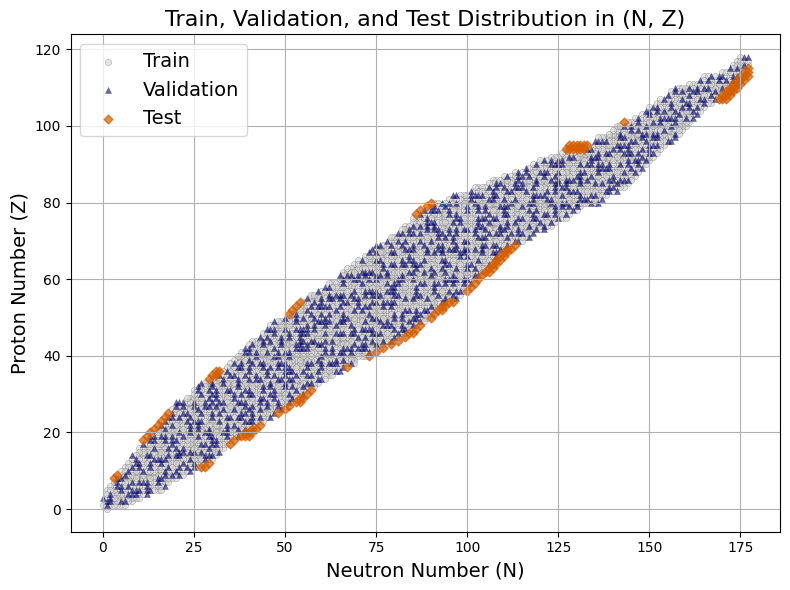

In [229]:
# Step 6: Plot N vs Z distributions
plt.figure(figsize=(8, 6))
plt.scatter(train_df["N"], train_df["Z"], alpha=0.6, c="lightgray", label="Train", s=20, marker='o', edgecolors='k', linewidths=0.2)
plt.scatter(val_df["N"], val_df["Z"], alpha=0.6, c="navy", label="Validation", s=20, marker='^', edgecolors='k', linewidths=0.2)
plt.scatter(test_df["N"], test_df["Z"], alpha=0.7, c="#D55E00", label="Test", s=20, marker='D')
plt.xlabel("Neutron Number (N)", fontsize=14)
plt.ylabel("Proton Number (Z)", fontsize=14)
plt.title("Train, Validation, and Test Distribution in (N, Z)", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("plot/train_val_test_NZ_distribution.png", dpi=300)
plt.show()

In [230]:
val_df.to_csv('data/validation.csv', index=False)

In [231]:
train_df.to_csv('data/train.csv', index=False)